In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
base_utils_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'Base'))
if base_utils_path not in sys.path:
    sys.path.append(base_utils_path)
from utils import generate_combinations
import pandas as pd

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'Base'))
if base_dir not in sys.path:
    sys.path.append(base_dir)

from Combo_CC_Base import Combo_CC

In [2]:
prod_x = prod_y = ['1','x','y']
rem_x = rem_y = ['1','x','y','x*y','x^2','y^2']
lists = [prod_x,rem_x,prod_y,rem_y]
k_values = [2,1,1,1]

df = generate_combinations(lists, k_values,['prod_x','rem_x','prod_y','rem_y'])
remarks = ['' for i in range(len(df))]
df['remarks'] = remarks
# Print the DataFrame
print(df.to_string())


    prod_x_item_1 prod_x_item_2 rem_x_item_1 prod_y_item_1 rem_y_item_1 remarks
0               1             x            1             1            1        
1               1             x            1             1            x        
2               1             x            1             1            y        
3               1             x            1             1          x*y        
4               1             x            1             1          x^2        
5               1             x            1             1          y^2        
6               1             x            1             x            1        
7               1             x            1             x            x        
8               1             x            1             x            y        
9               1             x            1             x          x*y        
10              1             x            1             x          x^2        
11              1             x         

In [3]:
remarks = ['' for i in range(len(df))]
for i in range(len(df)):
    prod_x_set = {df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2']}
    rem_x_set = {df.iloc[i]['rem_x_item_1']}
    rem_y_set = {df.iloc[i]['rem_y_item_1']}
    prod_y_set = {df.iloc[i]['prod_y_item_1']}
    x_set = rem_x_set.union(prod_x_set)
    y_set = rem_y_set.union(prod_y_set)
    if rem_x_set.issubset(prod_x_set):
        if not 'zero behaviour of x at origin,' in remarks[i]:
            remarks[i] += 'zero behaviour of x at origin,'
    if rem_y_set.issubset(prod_y_set):
        if not 'zero behaviour of y at origin,' in remarks[i]:
            remarks[i] += 'zero behaviour of y at origin,'
    if y_set.issubset({'x','x*y','x^2'}):
        if not 'x=0 is a line of fixed points' in remarks[i]:
            remarks[i] += 'x=0 is a line of fixed points,'
    cm = Combo_CC([df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2']],[df.iloc[i]['rem_x_item_1']],[df.iloc[i]['prod_y_item_1']],[df.iloc[i]['rem_y_item_1']],
                      parameter_placement='x',find_nullclines=False)
    if (not (cm.y in cm.P.free_symbols)) and (not (cm.x in cm.Q.free_symbols)):
        remarks[i] += 'not connected,'
    elif (not (cm.y in cm.P.free_symbols)) or (not (cm.x in cm.Q.free_symbols)):
        remarks[i] += 'no feedback,'


df['remarks']=remarks
print(len(df[df['remarks']=='']))

99


In [ ]:
from conditions_five import check_stability
from Combo_CC_Base import Combo_CC
remarks = df['remarks'].copy()
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        cm = Combo_CC([df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2']],[df.iloc[i]['rem_x_item_1']],[df.iloc[i]['prod_y_item_1']],[df.iloc[i]['rem_y_item_1']],
                      parameter_placement='x')
        print(f'dxdt = {cm.P}, dydt = {cm.Q}')
        stab = check_stability(cm,[0,0])
        if stab==False:
            if not '0 is not stable' in remarks[i]:
                remarks[i]+='0 is not stable,'
df['remarks']=remarks
print(len(df[df['remarks']=='']))

dxdt = x*(-y + (1 - x/100)*(dp0 + dp1*x)), dydt = y*(-x - y/100 + 1)
eigenvalues real part: [dp0, 1]
stability determined by linear approximation: False
dxdt = x*(-y + (1 - x/100)*(dp0 + dp1*x)), dydt = y*(-x*y - y/100 + 1)
eigenvalues real part: [dp0, 1]
stability determined by linear approximation: False
dxdt = x*(-y + (1 - x/100)*(dp0 + dp1*x)), dydt = y*(-x**2 - y/100 + 1)
eigenvalues real part: [dp0, 1]
stability determined by linear approximation: False
dxdt = x*(-y + (1 - x/100)*(dp0 + dp1*x)), dydt = y*(x*(1 - y/100) - 1)
eigenvalues real part: [dp0, -1]
stability determined by linear approximation: False
dxdt = x*(-y + (1 - x/100)*(dp0 + dp1*x)), dydt = y*(x*(1 - y/100) - y)
eigenvalues real part: [dp0, 0]
stability determined by linear approximation: False
dxdt = x*(-y + (1 - x/100)*(dp0 + dp1*x)), dydt = y*(x*(1 - y/100) - y**2)
eigenvalues real part: [dp0, 0]
stability determined by linear approximation: False
dxdt = x*(-y + (1 - x/100)*(dp0 + dp1*x)), dydt = y*(-x + y*(1 -

In [5]:
remarks = df['remarks'].copy()
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        prod_x_set = {df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2']}
        rem_x_set = {df.iloc[i]['rem_x_item_1']}
        rem_y_set = {df.iloc[i]['rem_y_item_1']}
        prod_y_set = {df.iloc[i]['prod_y_item_1']}
        x_set = rem_x_set.union(prod_x_set)
        y_set = rem_y_set.union(prod_y_set)
        if prod_y_set=={'x'} and rem_y_set.issubset({'y','y^2'}):
            remarks[i]+='0 is not stable,'
        if prod_y_set=={'y'} and rem_y_set.issubset({'x','x^2'}):
            remarks[i]+='0 is not stable,'
df['remarks']=remarks
print(len(df[df['remarks']=='']))


7


In [6]:
cms_remain = []
counter = 0
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        cm = Combo_CC([df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2']],[df.iloc[i]['rem_x_item_1']],[df.iloc[i]['prod_y_item_1']],[df.iloc[i]['rem_y_item_1']],
                      parameter_placement='x')
        cms_remain.append(cm)
        print(f'{counter} dxdt = {cm.P}, dydt = {cm.Q}')
        counter +=1
print(counter)


0 dxdt = x*((1 - x/100)*(dp0*x + dp1*y) - 1), dydt = y*(x*(1 - y/100) - 1)
1 dxdt = x*(-x*y + (1 - x/100)*(dp0*x + dp1*y)), dydt = y*(x*(1 - y/100) - 1)
2 dxdt = x*(-x*y + (1 - x/100)*(dp0*x + dp1*y)), dydt = y*(-x*y + y*(1 - y/100))
3 dxdt = x*(-x**2 + (1 - x/100)*(dp0*x + dp1*y)), dydt = y*(x*(1 - y/100) - 1)
4 dxdt = x*(-x**2 + (1 - x/100)*(dp0*x + dp1*y)), dydt = y*(-x*y + y*(1 - y/100))
5 dxdt = x*(-y**2 + (1 - x/100)*(dp0*x + dp1*y)), dydt = y*(x*(1 - y/100) - 1)
6 dxdt = x*(-y**2 + (1 - x/100)*(dp0*x + dp1*y)), dydt = y*(-x*y + y*(1 - y/100))
7


plotting combo 1/7
plotting combo 2/7
plotting combo 3/7
plotting combo 4/7
plotting combo 5/7
plotting combo 6/7
plotting combo 7/7


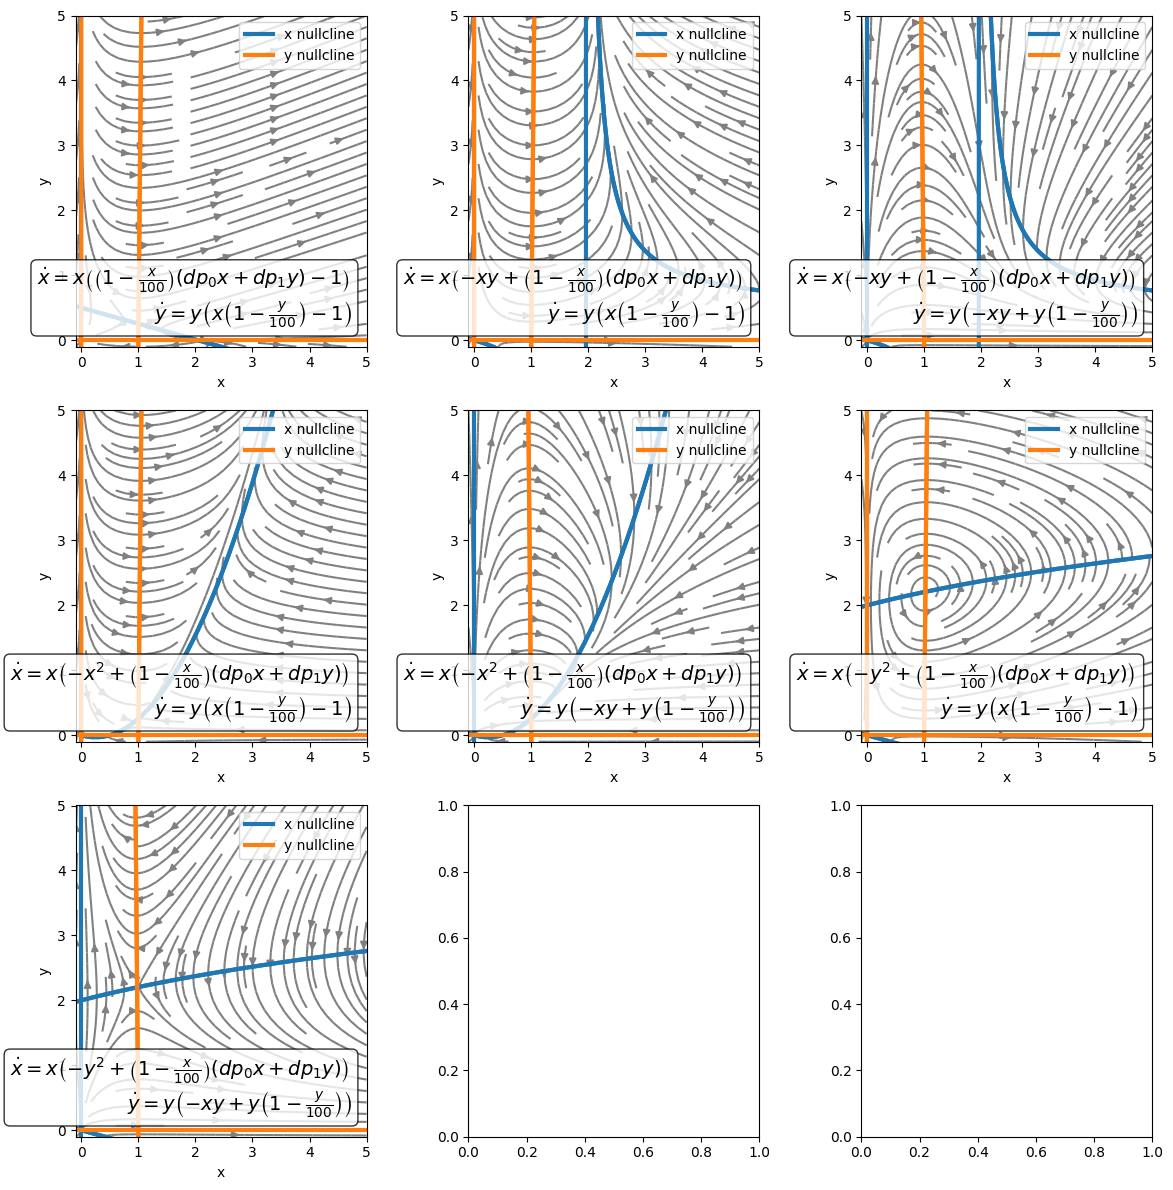

In [7]:
from utils import draw_combos_phase_portraits
par_dicts = [{'dp0':3,'dp1':1},{'dp0':1,'dp1':2},{'dp0':4,'dp1':1},
             {'dp0':4,'dp1':1},{'dp0':5,'dp1':1},{'dp0':5,'dp1':1}]
fig,axs = draw_combos_phase_portraits(cms_remain,{'dp0':0.5,'dp1':2},3,True,4,4,[-0.1,5],[-0.1,5])


In [8]:
remarks = df['remarks'].copy()
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        prod_x_set = {df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2']}
        rem_x_set = {df.iloc[i]['rem_x_item_1']}
        rem_y_set = {df.iloc[i]['rem_y_item_1']}
        prod_y_set = {df.iloc[i]['prod_y_item_1']}
        x_set = rem_x_set.union(prod_x_set)
        y_set = rem_y_set.union(prod_y_set)
        if not {'1'}.issubset(rem_x_set):
            remarks[i]+='0 is not stable,'
df['remarks']=remarks
print(len(df[df['remarks']=='']))
cms_remain = []
counter = 0
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        cm = Combo_CC([df.iloc[i]['prod_x_item_1'],df.iloc[i]['prod_x_item_2']],[df.iloc[i]['rem_x_item_1']],[df.iloc[i]['prod_y_item_1']],[df.iloc[i]['rem_y_item_1']],
                      parameter_placement='x')
        cms_remain.append(cm)
        print(f'{counter} dxdt = {cm.P}, dydt = {cm.Q}')
        counter +=1
print(counter)


1
0 dxdt = x*((1 - x/100)*(dp0*x + dp1*y) - 1), dydt = y*(x*(1 - y/100) - 1)
1


plotting combo 1/1


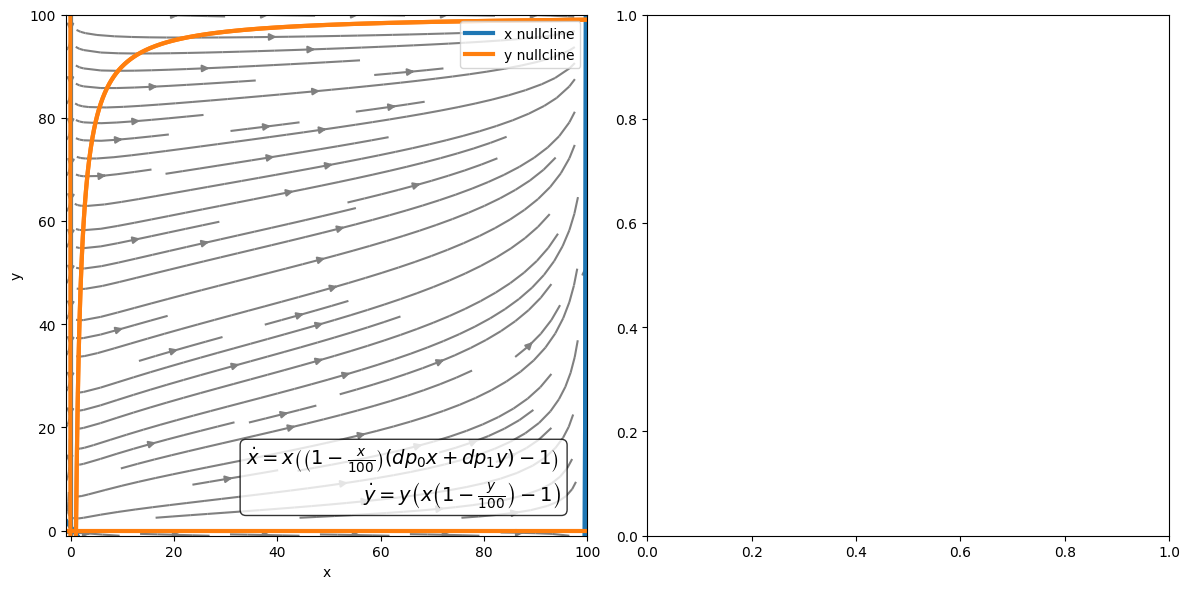

plotting combo 1/1


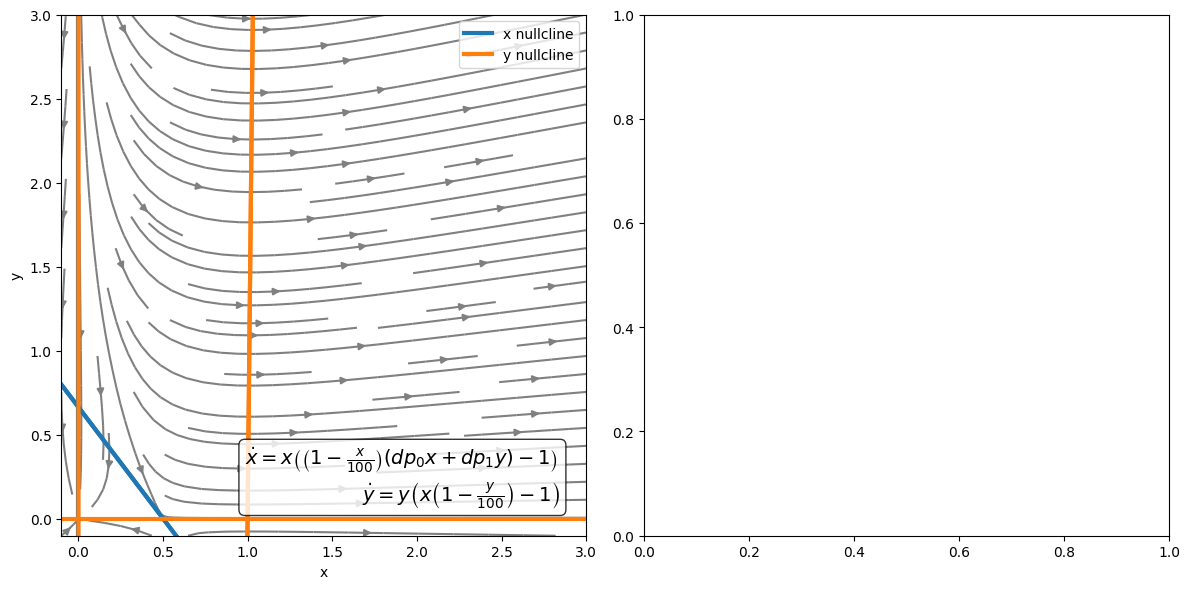

In [9]:
fig,axs = draw_combos_phase_portraits(cms_remain,{'dp0':2,'dp1':1.5},2,True,6,6,[-1,100],[-1,100])
plt.show()
fig,axs = draw_combos_phase_portraits(cms_remain,{'dp0':2,'dp1':1.5},2,True,6,6,[-0.1,3],[-0.1,3])


In [10]:
remarks = df['remarks'].copy()

for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        remarks[i]+='another stable fp at all parameter values'

df['remarks']=remarks


In [13]:
df.to_csv('row6.csv')